In [1]:
# Import Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [2]:
#Load Dataset
from tensorflow.keras.datasets import mnist
(features_train, targets_train), (features_test, targets_test) = mnist.load_data()
targets_train

11501568/11490434 [==============================] - 0s 0us/step


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [3]:
features_train[0].shape

(28, 28)

In [4]:
features_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

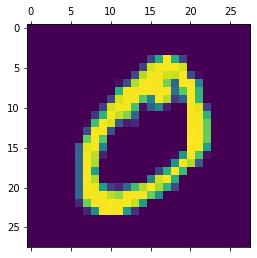

In [5]:
plt.matshow(features_train[1])

In [6]:
targets_train[1]

0

In [7]:
#Scaling features between 0 and 1
features_train=features_train/255;
features_test=features_test/255
features_train[0]
# plt.matshow(features_train[1])

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [8]:
features_train.shape

(60000, 28, 28)

In [9]:
#Reshape features shape (28x28 matrix into 1 dimentional array)
features_train_flattened = features_train.reshape(len(features_train), 28*28)
features_test_flattened = features_test.reshape(len(features_test), 28*28)
features_train_flattened.shape

(60000, 784)

In [10]:
features_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [11]:
#make layers(only input and output layer, NO HIDDEN LAYER is there), also specify activation function as sigmoid
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid') #10 output layers
])
#optimizer for finding better gradient dicent 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(features_train_flattened, targets_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4672 - accuracy: 0.8769
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3039 - accuracy: 0.9152
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2831 - accuracy: 0.9212
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2731 - accuracy: 0.9239
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2665 - accuracy: 0.9257


In [12]:
# find accuracy of test dataset
model.evaluate(features_test_flattened,targets_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2667 - accuracy: 0.9258


[0.266659677028656, 0.9258000254631042]

**Predict value based on features**

In [13]:
#predict values of test and store into array
y_predicted = model.predict(features_test_flattened)
y_predicted[0]

array([2.22096145e-02, 3.80935091e-07, 6.95662200e-02, 9.59271491e-01,
       2.40167975e-03, 1.07666641e-01, 2.45494061e-06, 9.99863386e-01,
       1.15351796e-01, 6.52538657e-01], dtype=float32)

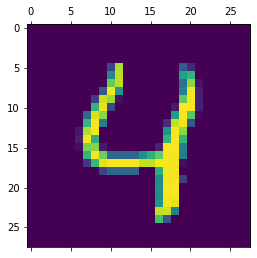

In [16]:
# print Acture target value(which is 2)
plt.matshow(features_test[4])


In [17]:
np.argmax(y_predicted[4])

4

**Using Hidden Layer**

In [18]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'), # hidden layer size is 100 and activation function is relu
    keras.layers.Dense(10, activation='sigmoid') # output layer size is 10 and activation  function is sigmoid
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(features_train_flattened, targets_train, epochs=5) #epoch is no. of iteration through model is train

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2669 - accuracy: 0.9256
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1210 - accuracy: 0.9643
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0850 - accuracy: 0.9747
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0653 - accuracy: 0.9803
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0509 - accuracy: 0.9847


In [19]:
model.evaluate(features_test_flattened,targets_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0968 - accuracy: 0.9711


[0.09678308665752411, 0.9710999727249146]

**using Support Vector Machine**

In [20]:
from sklearn.svm import SVC
model = SVC(C=10) # C- Regularization 

In [21]:
model.fit(features_train_flattened,targets_train)

SVC(C=10)

**using support vector maching getting accuracy 98% which is more then accuracy of multilayer perceptron with hidden layers.**

In [22]:
model.score(features_test_flattened,targets_test)

0.9837